<a href="https://colab.research.google.com/github/ruanwensheng/Conflagaration-Detection-Using-YOLOv11/blob/main/Fire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sat Jul 26 13:31:05 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   43C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [4]:
!unzip -q /content/f.zip -d /content/custom_data

In [5]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 66.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 59.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [8]:
# Python function to automatically create data.yaml config file
# 1. Reads "classes.txt" file to get list of class names
# 2. Creates data dictionary with correct paths to folders, number of classes, and names of classes
# 3. Writes data in YAML format to data.yaml

import yaml
import os

def create_data_yaml(path_to_classes_txt, path_to_data_yaml):

  # Read class.txt to get class names
  if not os.path.exists(path_to_classes_txt):
    print(f'classes.txt file not found! Please create a classes.txt labelmap and move it to {path_to_classes_txt}')
    return
  with open(path_to_classes_txt, 'r') as f:
    classes = []
    for line in f.readlines():
      if len(line.strip()) == 0: continue
      classes.append(line.strip())
  number_of_classes = len(classes)

  # Create data dictionary
  data = {
      'path': '/content/custom_data',
      'train': 'train/images',
      'val': 'valid/images',
      'nc': number_of_classes,
      'names': classes
  }

  # Write data to YAML file
  with open(path_to_data_yaml, 'w') as f:
    yaml.dump(data, f, sort_keys=False)
  print(f'Created config file at {path_to_data_yaml}')

  return

# Define path to classes.txt and run function
path_to_classes_txt = '/content/custom_data/classes.txt'
path_to_data_yaml = '/content/data.yaml'

create_data_yaml(path_to_classes_txt, path_to_data_yaml)

print('\nFile contents:\n')
!cat /content/data.yaml

Created config file at /content/data.yaml

File contents:

path: /content/custom_data
train: train/images
val: valid/images
nc: 1
names:
- '0'


In [9]:
!yolo detect train data=/content/data.yaml model=yolo11s.pt epochs=30 imgsz=640

Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, pr

In [12]:
!yolo detect predict model=runs/detect/train2/weights/best.pt source=custom_data/valid/images save=True

Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs

image 1/264 /content/custom_data/valid/images/0399df21fb136d97_jpg.rf.630e63d472d5f4fd32c8b0f305507329.jpg: 640x640 1 0, 15.6ms
image 2/264 /content/custom_data/valid/images/0738bab1cf81a052_jpg.rf.dc8f6be2b965ea85a9d9957220d73b26.jpg: 640x640 3 0s, 15.7ms
image 3/264 /content/custom_data/valid/images/08e73c1800e2cef2_jpg.rf.d7ab8024e9682f47d0e5e1fbcf82e496.jpg: 640x640 2 0s, 15.6ms
image 4/264 /content/custom_data/valid/images/0_jpg.rf.31c67ef7a0c0074bcdb68e5a69706061.jpg: 640x640 2 0s, 15.5ms
image 5/264 /content/custom_data/valid/images/1-Copy_jpg.rf.86de40aaa88ea12990c0516b38f8c5d7.jpg: 640x640 2 0s, 15.5ms
image 6/264 /content/custom_data/valid/images/1044_jpg.rf.62506a3ffcd16c5e0f797863571d38a6.jpg: 640x640 1 0, 15.5ms
image 7/264 /content/custom_data/valid/images/1072_jpg.rf.7dd179ed672b271f9f8fb6cf6d350f56.jpg: 6

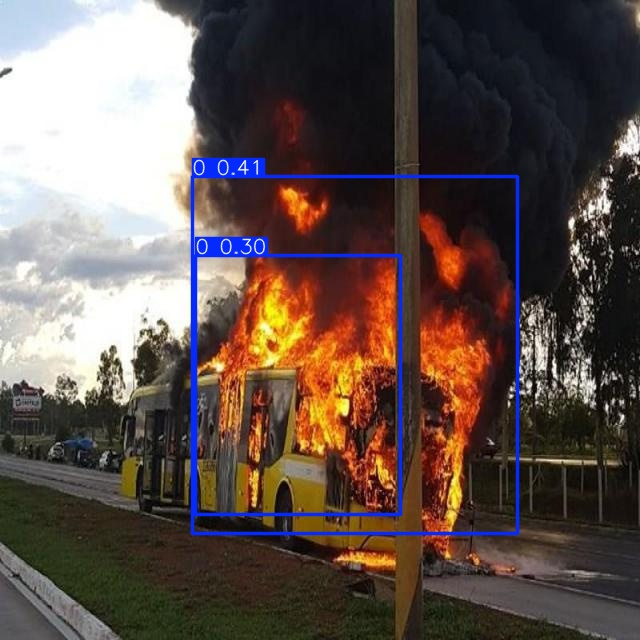

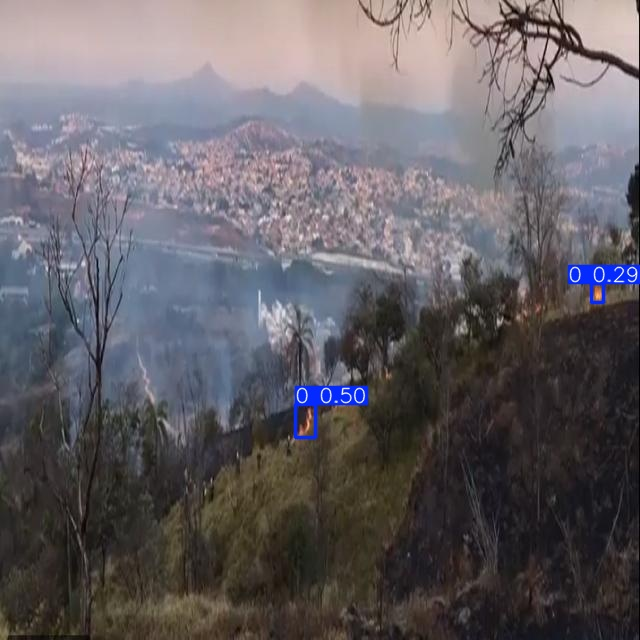

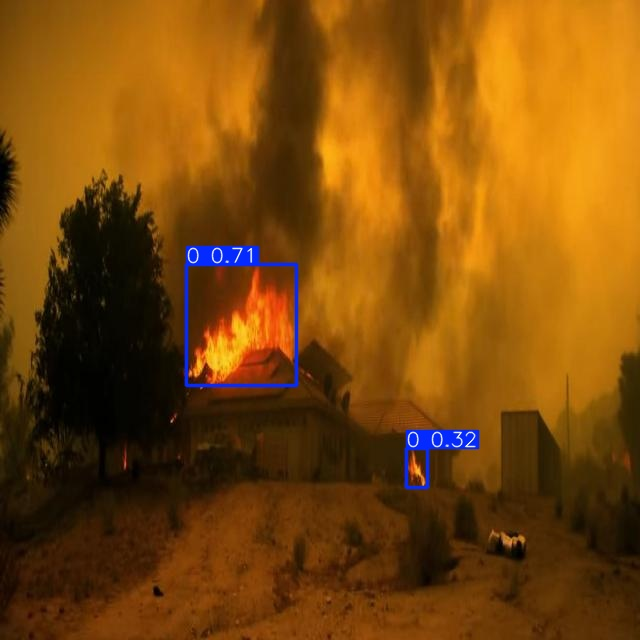

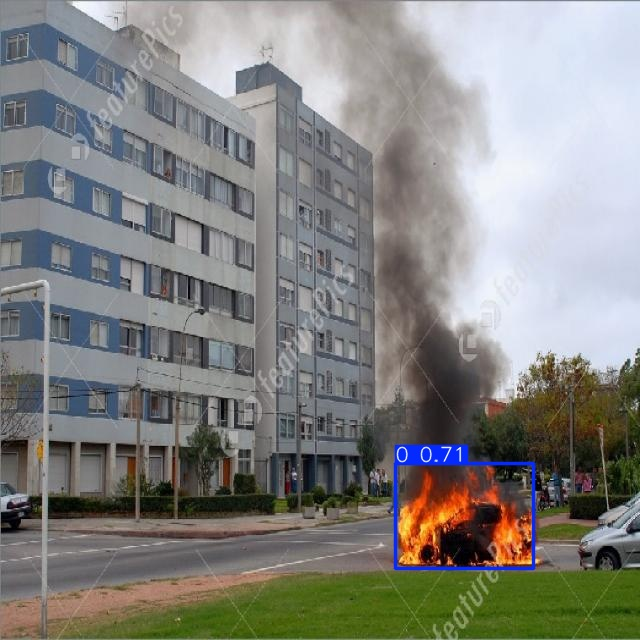

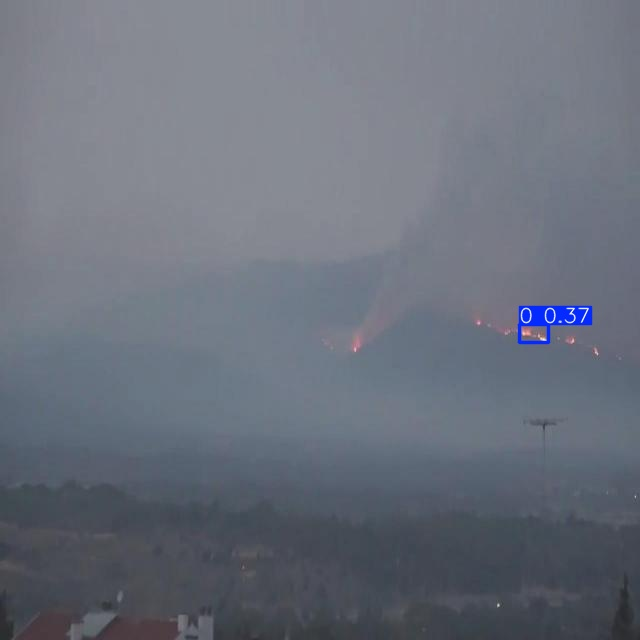

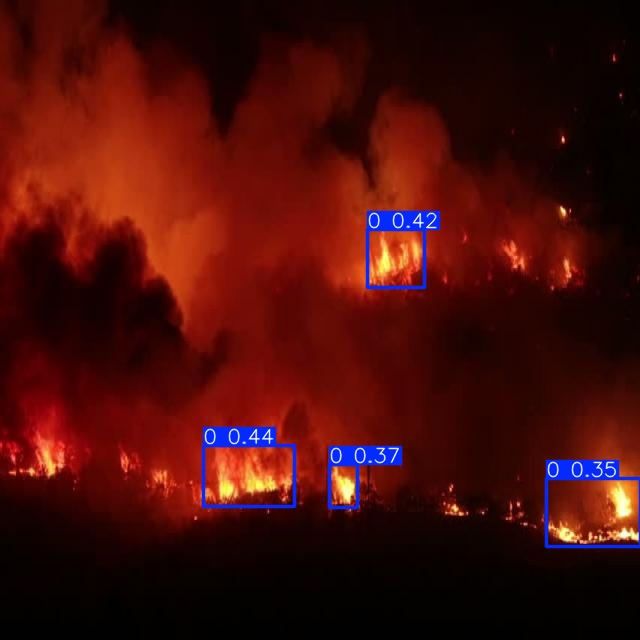

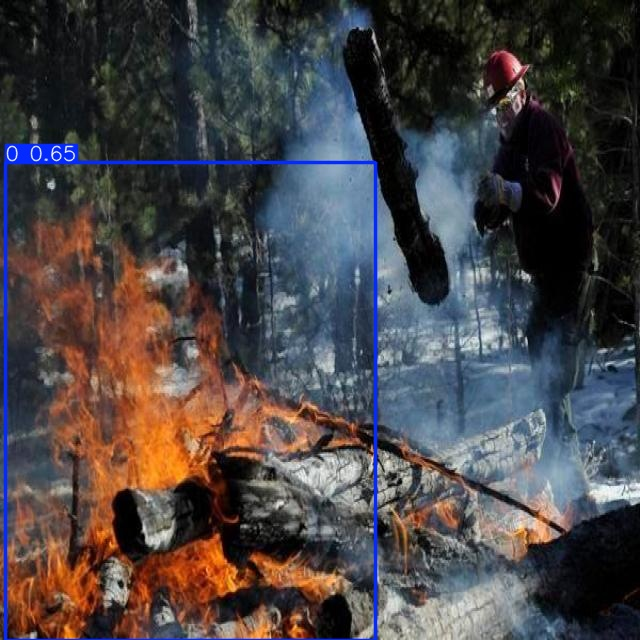

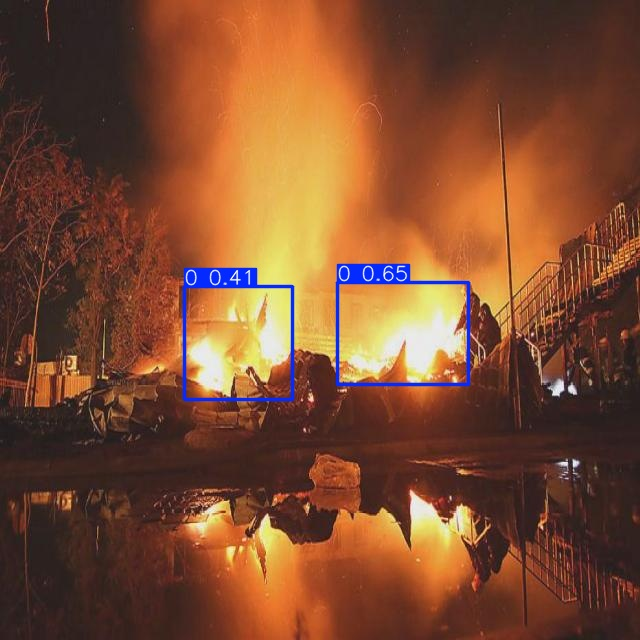

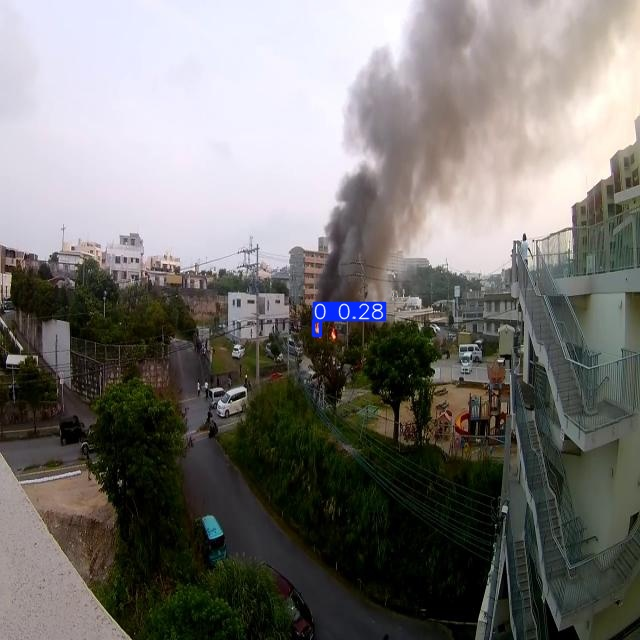

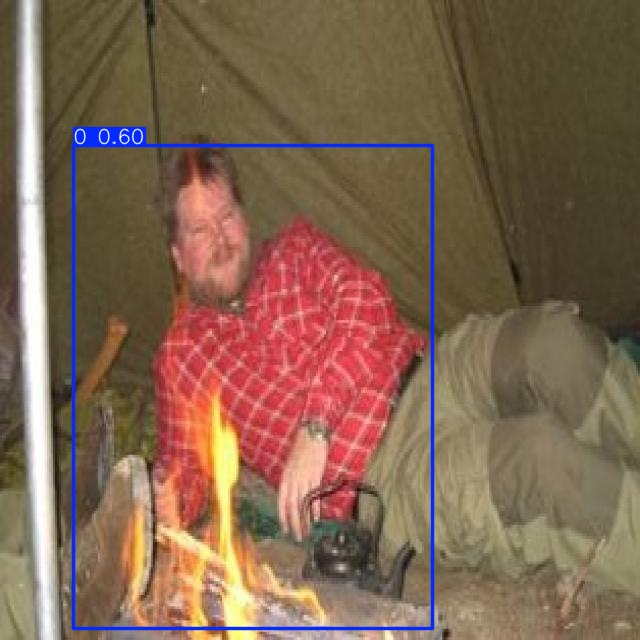

In [13]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:10]:
  display(Image(filename=image_path, height=400))
  print('\n')

In [16]:
# Create "my_model_2" folder to store model weights and train results
!mkdir /content/my_model_2
!cp /content/runs/detect/train2/weights/best.pt /content/my_model_2/my_model.pt
!cp -r /content/runs/detect/train2 /content/my_model_2

# Zip into "my_model_2.zip"
%cd /content/my_model_2
!zip /content/my_model_2.zip my_model.pt
!zip -r /content/my_model_2.zip train2
%cd /content


/content/my_model_2
  adding: my_model.pt (deflated 8%)
  adding: train2/ (stored 0%)
  adding: train2/args.yaml (deflated 53%)
  adding: train2/BoxPR_curve.png (deflated 17%)
  adding: train2/train_batch1.jpg (deflated 4%)
  adding: train2/confusion_matrix_normalized.png (deflated 37%)
  adding: train2/labels_correlogram.jpg (deflated 36%)
  adding: train2/train_batch2.jpg (deflated 2%)
  adding: train2/labels.jpg (deflated 23%)
  adding: train2/BoxR_curve.png (deflated 17%)
  adding: train2/BoxP_curve.png (deflated 16%)
  adding: train2/train_batch1341.jpg (deflated 6%)
  adding: train2/val_batch0_pred.jpg (deflated 7%)
  adding: train2/results.png (deflated 8%)
  adding: train2/val_batch1_pred.jpg (deflated 7%)
  adding: train2/BoxF1_curve.png (deflated 18%)
  adding: train2/train_batch1340.jpg (deflated 8%)
  adding: train2/val_batch2_labels.jpg (deflated 6%)
  adding: train2/results.csv (deflated 59%)
  adding: train2/train_batch1342.jpg (deflated 10%)
  adding: train2/confusion_m

In [ ]:
import os
import shutil

# Define source and destination paths
source_data_path = '/content/custom_data'
source_model_path = '/content/my_model'
destination_path = '/content/drive/MyDrive/lp_detection_project'

# Create the destination directory in Google Drive if it doesn't exist
os.makedirs(destination_path, exist_ok=True)

# Copy the data and model folders
try:
    shutil.copytree(source_data_path, os.path.join(destination_path, 'custom_data'))
    print(f'Successfully copied {source_data_path} to {destination_path}/custom_data')
except FileExistsError:
    print(f'{destination_path}/custom_data already exists. Skipping copy.')

try:
    shutil.copytree(source_model_path, os.path.join(destination_path, 'my_model'))
    print(f'Successfully copied {source_model_path} to {destination_path}/my_model')
except FileExistsError:
    print(f'{destination_path}/my_model already exists. Skipping copy.')

Successfully copied /content/custom_data to /content/drive/MyDrive/lp_detection_project/custom_data
Successfully copied /content/my_model to /content/drive/MyDrive/lp_detection_project/my_model
